### Entropy  

Measures randomeness of a system  
  
H(S) = -Σ P<sub>c</sub> log<sub>2</sub>(P<sub>c</sub>)     

P<sub>c</sub> -> prob. of class C
  
// maxm when prob. is 0.5  
  
### Information Gain  
  
Weighted decrease in entropy
  
Information Gain when set S is split about attribute A  

IG(S, A) = H(S) - Σ (|S<sub>v</sub>| / |S|) * H(S<sub>v</sub>)    

// S<sub>v</sub> is the new set

#### Goal of Decision Tree -> Maximise info. gain or reduce entropy

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('Train.csv')

In [14]:
data.head(n = 10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
5,2.0,0.0,"Gaskell, Mr. Alfred",male,16.0,0.0,0.0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
6,2.0,0.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S,NaN,NaN,"Ilfracombe, Devon"
7,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
8,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
9,2.0,0.0,"Wheeler, Mr. Edwin ""Frederick""",male,NaN,0.0,0.0,SC/PARIS 2159,12.8750,NaN,S,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [16]:
a = data.iloc[:, 11]

In [17]:
for i in range(data.shape[0]) :
    if pd.isna(data.iloc[i, 11]) :
        data.iloc[i, 11] = 0
    else :
        data.iloc[i, 11] = 1

In [18]:
for i in range(data.shape[0]) :
    if pd.isnull(data.iloc[i, 11]) :
        data.iloc[i, 11] = 'nan'
    data.iloc[i, 11] = str(data.iloc[i, 11])
le2 = LabelEncoder()
data.iloc[:, 11] = le2.fit_transform(data.iloc[:, 11])

### Preprocessing Data

- Dropping features that are not useful
- Data Imputation

In [19]:
columns_to_drop = ['name', 'ticket', 'cabin', 'embarked', 'body', 'home.dest']

In [20]:
data_clean = data.drop(columns_to_drop, axis = 1)

In [21]:
data_clean.head(n = 10)

,pclass,survived,sex,age,sibsp,parch,fare,boat
0,3.0,0.0,female,NaN,0.0,0.0,7.7500,0
1,2.0,0.0,male,39.0,0.0,0.0,26.0000,0
2,2.0,1.0,female,40.0,0.0,0.0,13.0000,1
3,3.0,1.0,female,31.0,1.0,1.0,20.5250,1
4,3.0,1.0,female,NaN,2.0,0.0,23.2500,1
5,2.0,0.0,male,16.0,0.0,0.0,26.0000,0
6,2.0,0.0,male,43.0,0.0,1.0,21.0000,0
7,1.0,1.0,female,49.0,0.0,0.0,25.9292,1
8,1.0,0.0,male,48.0,0.0,0.0,50.4958,0
9,2.0,0.0,male,NaN,0.0,0.0,12.8750,0


In [23]:
le = LabelEncoder()
data_clean['sex'] = le.fit_transform(data_clean['sex'])

In [24]:
data_clean

,pclass,survived,sex,age,sibsp,parch,fare,boat
0,3.0,0.0,0,NaN,0.0,0.0,7.7500,0
1,2.0,0.0,1,39.0,0.0,0.0,26.0000,0
2,2.0,1.0,0,40.0,0.0,0.0,13.0000,1
3,3.0,1.0,0,31.0,1.0,1.0,20.5250,1
4,3.0,1.0,0,NaN,2.0,0.0,23.2500,1
...,...,...,...,...,...,...,...,...
1004,1.0,1.0,1,40.0,0.0,0.0,31.0000,1
1005,3.0,0.0,0,37.0,0.0,0.0,9.5875,0
1006,1.0,1.0,0,23.0,1.0,0.0,113.2750,1
1007,3.0,1.0,1,12.0,1.0,0.0,11.2417,1


In [25]:
sex_enc = {
    'male': 1,
    'female': 0
}

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int64  
 3   age       812 non-null    float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1008 non-null   float64
 7   boat      1009 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 63.2 KB


In [27]:
data_clean['age'] = data_clean['age'].fillna(data_clean['age'].mean())
data_clean['fare'] = data_clean['fare'].fillna(data_clean['fare'].mean())

In [28]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int64  
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
 7   boat      1009 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 63.2 KB


In [29]:
# from sklearn.preprocessing import SimpleImputer
# imp = Imputer(missing_values = np.nan, strategy = 'mean')
# data_clean = pd.DataFrame(imp.fit_transform(data_clean))

In [30]:
data_clean.loc[1]

pclass       2.0
survived     0.0
sex          1.0
age         39.0
sibsp        0.0
parch        0.0
fare        26.0
boat         0.0
Name: 1, dtype: float64

In [31]:
input_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'boat']

In [32]:
output_cols = ['survived']

In [33]:
X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape, Y.shape)

(1009, 7) (1009, 1)


### Implement ntropy and Information Gain

In [34]:
def entropy(col) :
    
    counts = np.unique(col, return_counts = True)
    # (np.array(all unique values), np.array(respective counts))
    
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1] :
        prob = ix / N
        ent += (-1.0 * prob * np.log2(prob))
        
    return ent

In [35]:
def divide_data(x_data, fkey, fval) :
# Work directly with Pandas Dataframe

    x_left = pd.DataFrame([], columns = x_data.columns)
    x_right = pd.DataFrame([], columns = x_data.columns)
    
    for ix in range(x_data.shape[0]) :
        val = x_data[fkey].loc[ix]
        
        if val > fval :
            x_right = x_right.append(x_data.loc[ix])
        else :
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left, x_right

In [36]:
def infoGain(x_data, fkey, fval) :
# fkey is column, and fval is threshold value for split
     
    left, right = divide_data(x_data, fkey, fval)
    
    l = float(left.shape[0]) / x_data.shape[0]
    r = float(right.shape[0]) / x_data.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0 :
        return -1000000 # Min info. gain, the result does not depend on that attribute, can return 0 as well
    
    i_gain = entropy(x_data.survived) - (l * entropy(left.survived) + r * entropy(right.survived))
    return i_gain

In [37]:
for fx in X.columns :
    print(fx)
    print(infoGain(data_clean, fx, data_clean[fx].mean()))

pclass
0.055456910002982474
sex
0.19274737190850932
age
0.001955929827451075
sibsp
0.006492394392888956
parch
0.01975608012294816
fare
0.04242793401428169
boat
0.805784154868207


### Implement Decision Tree

To prevent overfitting  
- Early stopping
- Post pruning

In [38]:
class DecisionTree :
    
    def __init__(self, depth = 0, max_depth = 5) : # depth is current depth
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None # Majority prediction for that node
       
    
    def train(self, X_train) :
        
        features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'boat']
        info_gains = []
        
        for ix in features :
            i_gain = infoGain(X_train, ix, X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        
        print('Building Tree with the feature for splitting being', self.fkey)
        
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop = True)
        
        if X_train.survived.mean() >= 0.5 :
            self.target = "Survived"
        else :
            self.target = "Dead"

        # truly leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0 :
            return
                
        # stop early when depth >= max_depth
        if self.depth >= self.max_depth :
            return
        
        self.left = DecisionTree(depth = self.depth + 1, max_depth = self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth = self.depth + 1, max_depth = self.max_depth)
        self.right.train(data_right)
        
        
    def predict(self, test) :
        
        if test[self.fkey] > self.fval :
            # go to right
            if self.right is None :
                return self.target
            else :
                return self.right.predict(test)
            
        else :
            # go to left
            if self.left is None :
                return self.target
            else :
                return self.left.predict(test)

### Split dataset into Train, Validation, and Test

In [39]:
split = int(0.8 * data_clean.shape[0])
# split = int(1 * data_clean.shape[0])

train_data = data_clean[ : split]
test_data = data_clean[split : ]
test_data = test_data.reset_index(drop = True)

In [40]:
print(train_data.shape, test_data.shape)

(807, 8) (202, 8)


In [41]:
dt = DecisionTree(max_depth=2)
dt.train(train_data)

Building Tree with the feature for splitting being boat
Building Tree with the feature for splitting being sex
Building Tree with the feature for splitting being fare
Building Tree with the feature for splitting being pclass
Building Tree with the feature for splitting being sex
Building Tree with the feature for splitting being sibsp
Building Tree with the feature for splitting being parch


In [42]:
print(dt.fkey, dt.fval)

boat 0.3630731102850062


In [43]:
print(dt.left.fkey, dt.left.fval)
print(dt.right.fkey, dt.right.fval)

sex 0.8385214007782101
sex 0.33447098976109213


In [44]:
y_pred = []

for ix in range(train_data.shape[0]) :
    y_pred.append(dt.predict(train_data.loc[ix]))

In [45]:
y_actual = train_data[output_cols]
print(y_actual)

survived
0         0.0
1         0.0
2         1.0
3         1.0
4         1.0
..        ...
802       1.0
803       1.0
804       1.0
805       0.0
806       0.0

[807 rows x 1 columns]


In [46]:
le = LabelEncoder()
y_pred = np.array(le.fit_transform(y_pred)).reshape((-1, 1))

In [48]:
acc = np.sum(y_pred == y_actual) / y_pred.shape[0]
print(acc)

survived    0.981413
dtype: float64


### Using Sklearn

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

In [51]:
sk_tree.fit(train_data[input_cols], train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [52]:
sk_tree.predict(train_data[input_cols])

array([0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0.

In [53]:
sk_tree.score(train_data[input_cols], train_data[output_cols])

0.9863692688971499

### Visualise a Decision Tree

In [54]:
# import pydotplus
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz

In [55]:
# dot_data = StringIO()
# export_graphviz(sk_tree, out_file = dot_data, filled = True, rounded = True)

In [56]:
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

## Random Forest

In [57]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1, 1))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1, 1))

In [58]:
sk_tree = DecisionTreeClassifier(criterion='gini')
sk_tree.fit(X_train, Y_train)
print(sk_tree.score(X_train, Y_train))

0.9987608426270136


In [59]:
print(sk_tree.score(X_test, Y_test))

0.9504950495049505


In [60]:
sk_tree = DecisionTreeClassifier(criterion='gini', max_depth=2)
sk_tree.fit(X_train, Y_train)
print(sk_tree.score(X_train, Y_train))

0.9814126394052045


In [61]:
print(sk_tree.score(X_test, Y_test))

0.9653465346534653


In [62]:
# Training Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy')

In [65]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [66]:
print(rf.score(X_train, Y_train))

0.9987608426270136


In [67]:
print(rf.score(X_test, Y_test))

0.9702970297029703


In [68]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10)

In [69]:
print(rf.score(X_train, Y_train))

0.9814126394052045


In [70]:
print(rf.score(X_test, Y_test))

0.9653465346534653


In [71]:
# Cross Validation score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
accuracy = cross_val_score(RandomForestClassifier(n_estimators=24, max_depth=5, criterion='entropy'), X_train, Y_train, cv=5).mean()

In [74]:
print(accuracy * 100)

98.14124683689901


In [78]:
acc_list = []

for i in range(1, 30) :
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth=2, criterion='entropy'), X_train, Y_train).mean()
    acc_list.append(acc)

In [79]:
import matplotlib.pyplot as plt

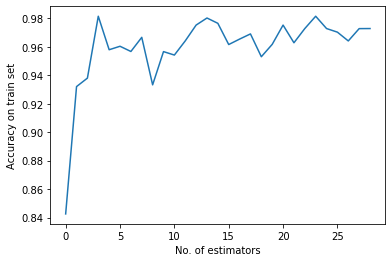

In [82]:
# plt.style.use('seaborn')
plt.plot(acc_list)
plt.xlabel('No. of estimators')
plt.ylabel('Accuracy on train set')
plt.show()

In [83]:
print(np.argmax(acc_list) + 1)

4


In [85]:
rf = RandomForestClassifier(n_estimators=4, criterion='entropy', max_depth=5)

In [86]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=4)

In [87]:
print(rf.score(X_train, Y_train))

0.9727385377942999


In [88]:
print(rf.score(X_test, Y_test))

0.9653465346534653


# PREDICTION

In [89]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0.0,0.0,PC 17474,26.3875,E25,S,5,NaN,"Brooklyn, NY"
1,3.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
2,1.0,"Rood, Mr. Hugh Roscoe",male,NaN,0.0,0.0,113767,50.0000,A32,S,NaN,NaN,"Seattle, WA"
3,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,NaN,NaN,"Vancouver, BC"
4,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,NaN,S,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio"


In [90]:
for i in range(test_df.shape[0]) :
    if pd.isnull(test_df.iloc[i, 10]) :
        test_df.iloc[i, 11] = 'nan'
    test_df.iloc[i, 10] = str(test_df.iloc[i, 10])
le2 = LabelEncoder()
test_df.iloc[:, 10] = le2.fit_transform(test_df.iloc[:, 10])

In [91]:
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0.0,0.0,PC 17474,26.3875,E25,S,13,NaN,"Brooklyn, NY"
1,3.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,24,nan,NaN
2,1.0,"Rood, Mr. Hugh Roscoe",male,NaN,0.0,0.0,113767,50.0000,A32,S,24,nan,"Seattle, WA"
3,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,24,nan,"Vancouver, BC"
4,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,NaN,S,24,nan,"Helsinki, Finland Ashtabula, Ohio"


In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     300 non-null    float64
 1   name       300 non-null    object 
 2   sex        300 non-null    object 
 3   age        234 non-null    float64
 4   sibsp      300 non-null    float64
 5   parch      300 non-null    float64
 6   ticket     300 non-null    object 
 7   fare       300 non-null    float64
 8   cabin      66 non-null     object 
 9   embarked   299 non-null    object 
 10  boat       300 non-null    int64  
 11  body       188 non-null    object 
 12  home.dest  163 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 30.6+ KB


In [93]:
test_df = test_df.drop(columns_to_drop, axis = 1)

In [94]:
test_df.head()

,pclass,sex,age,sibsp,parch,fare,boat
0,1.0,male,36.0,0.0,0.0,26.3875,13
1,3.0,female,NaN,8.0,2.0,69.5500,24
2,1.0,male,NaN,0.0,0.0,50.0000,24
3,2.0,male,34.0,0.0,0.0,13.0000,24
4,2.0,male,28.0,0.0,0.0,13.0000,24


In [95]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    object 
 2   age     234 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
 6   boat    300 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.5+ KB


In [96]:
test_df['age'] = test_df['age'].fillna(test_df['age'].mean())
test_df['fare'] = test_df['fare'].fillna(test_df['fare'].mean())

In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    object 
 2   age     300 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
 6   boat    300 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.5+ KB


In [98]:
test_df['sex'] = le.fit_transform(test_df['sex'])

In [99]:
test_df.head()

,pclass,sex,age,sibsp,parch,fare,boat
0,1.0,1,36.000000,0.0,0.0,26.3875,13
1,3.0,0,30.027422,8.0,2.0,69.5500,24
2,1.0,1,30.027422,0.0,0.0,50.0000,24
3,2.0,1,34.000000,0.0,0.0,13.0000,24
4,2.0,1,28.000000,0.0,0.0,13.0000,24


In [100]:
x_test_data = test_df[input_cols]

In [101]:
predictions = (sk_tree.predict(x_test_data))

In [102]:
predictions = predictions.reshape((-1,1))
print(predictions.shape)


(300, 1)


In [103]:
ans = np.zeros((300, 2))
for i in range(300) :
    ans[i, 0] = i
    ans[i, 1] = predictions[i, 0]

In [104]:
ans_df = pd.DataFrame(ans, columns=['Id', 'survived'])

In [105]:
convert_dict = {'Id': 'int64'}
ans_df = ans_df.astype(convert_dict) 
print(ans_df.dtypes)

Id            int64
survived    float64
dtype: object


In [106]:
ans_df.to_csv('answer.csv', index = False)

In [107]:
ans_df.head()

,Id,survived
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [108]:
x_test_data.head()

,pclass,sex,age,sibsp,parch,fare,boat
0,1.0,1,36.000000,0.0,0.0,26.3875,13
1,3.0,0,30.027422,8.0,2.0,69.5500,24
2,1.0,1,30.027422,0.0,0.0,50.0000,24
3,2.0,1,34.000000,0.0,0.0,13.0000,24
4,2.0,1,28.000000,0.0,0.0,13.0000,24


In [109]:
pred_scratch = []

for ix in range(x_test_data.shape[0]) :
    pred_scratch.append(dt.predict(x_test_data.loc[ix]))

In [110]:
pred_scratch = np.array(le.fit_transform(pred_scratch)).reshape((-1, 1))
pred_scratch.shape

(300, 1)

In [111]:
ans_scratch = np.zeros((300, 2))
for i in range(300) :
    ans_scratch[i, 0] = i
    ans_scratch[i, 1] = pred_scratch[i, 0]

In [112]:
ans_scratch_df = pd.DataFrame(ans_scratch, columns=['Id', 'survived'])

In [113]:
convert_dict = {'Id': 'int64'}
ans_scratch_df = ans_scratch_df.astype(convert_dict) 
print(ans_scratch_df.dtypes)

Id            int64
survived    float64
dtype: object


In [114]:
ans_scratch_df.head()

,Id,survived
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [115]:
ans_scratch_df.to_csv('answerscratch.csv', index = False)